# 순위에 따른 xlsx 파일 시각화

세미프로젝트1(크롤링)에서 생성한 엑셀 파일에 나타난 그룹별 순위를 시각화

패키지 삽입

In [5]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
import sys

기본적인 그래프 전역 설정

In [6]:
# 폰트 설정
plt.rcParams['font.family'] =  "Malgun Gothic"  # 윈도우 전용

# 글자 크기
plt.rcParams['font.size'] = 10

# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)

# 유니코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

데이터 가져오기

In [7]:
# 동일 폴더에 있는 genie_chart.xlsx 데이터 추출
xlsx = read_excel("C:\\Users\\jehyu\\Desktop\\SemiProject2\\main\\genie_chart.xlsx")
xlsx

,순위,날짜,곡명,아티스트,앨범명
0,1,20230601,퀸카 (Queencard),(여자)아이들,I feel
1,2,20230601,I AM,IVE (아이브),I've IVE
2,3,20230601,Spicy,aespa,MY WORLD - The 3rd Mini Album
3,4,20230601,Kitsch,IVE (아이브),I've IVE
4,5,20230601,UNFORGIVEN (Feat. Nile Rodgers),LE SSERAFIM (르세라핌),UNFORGIVEN
...,...,...,...,...,...
2795,96,20230628,Butter,방탄소년단,Butter
2796,97,20230628,VIBE (Feat. Jimin of BTS),태양,VIBE
2797,98,20230628,Weekend,태연 (TAEYEON),Weekend
2798,99,20230628,Bad,Christopher,Under the Surface


컬럼 데이터 확인

In [8]:
print(xlsx.columns)

Index(['순위', '날짜', '곡명', '아티스트', '앨범명'], dtype='object')


날짜별로 아티스트를 묶는다

가능하면 다르게

In [9]:
# # head를 넣지 않으면 xlsx 생성이 안됨
# df = xlsx.groupby('날짜').head()[['날짜','아티스트']]
# df

아티스트의 언급 횟수를 확인

In [10]:
count = xlsx['아티스트'].value_counts()
count

아티스트
임영웅                   164
IVE (아이브)             140
NewJeans              140
(여자)아이들               112
LE SSERAFIM (르세라핌)    112
                     ... 
박봄 (Park Bom)           1
코요태                     1
다이나믹 듀오                 1
길구봉구                    1
마크툽 (Maktub)            1
Name: count, Length: 89, dtype: int64

head를 사용해 상위 20위 아티스트만을 추출

In [11]:
xlsx1 = count.head(20)
xlsx1

아티스트
임영웅                   164
IVE (아이브)             140
NewJeans              140
(여자)아이들               112
LE SSERAFIM (르세라핌)    112
Charlie Puth           85
경서                     84
aespa                  64
지아 (Zia)               63
방탄소년단                  62
성시경                    56
BLACKPINK              56
이무진                    56
윤하 (YOUNHA)            56
태연 (TAEYEON)           52
멜로망스 (MeloMance)       50
DK (디셈버)               29
우디 (Woody)             29
잔나비                    29
WSG워너비 (4FIRE)         28
Name: count, dtype: int64

In [12]:
# 아티스트를 index로, 언급횟수를 column으로 갖는 새로운 그래프 생성
new_xlsx=DataFrame({'언급횟수': count})
new_xlsx

,언급횟수
아티스트,
임영웅,164
IVE (아이브),140
NewJeans,140
(여자)아이들,112
LE SSERAFIM (르세라핌),112
...,...
박봄 (Park Bom),1
코요태,1
다이나믹 듀오,1


In [13]:
# 아티스트 또한 column으로 사용해야 그래프를 수월하게 그릴 수 있기 때문에 
# rest_index를 사용해 index를 column으로 변경, 
# 상위 20 아티스트를 보여주는 xlsx 생성
xlsx2 = new_xlsx.reset_index().head(20)
xlsx2

,아티스트,언급횟수
0,임영웅,164
1,IVE (아이브),140
2,NewJeans,140
3,(여자)아이들,112
4,LE SSERAFIM (르세라핌),112
5,Charlie Puth,85
6,경서,84
7,aespa,64
8,지아 (Zia),63
9,방탄소년단,62


`barplot()` 함수를 사용해 아티스트별 언급 수를 바탕으로 그래프를 작성

In [14]:
xlsx2.dtypes

아티스트    object
언급횟수     int64
dtype: object

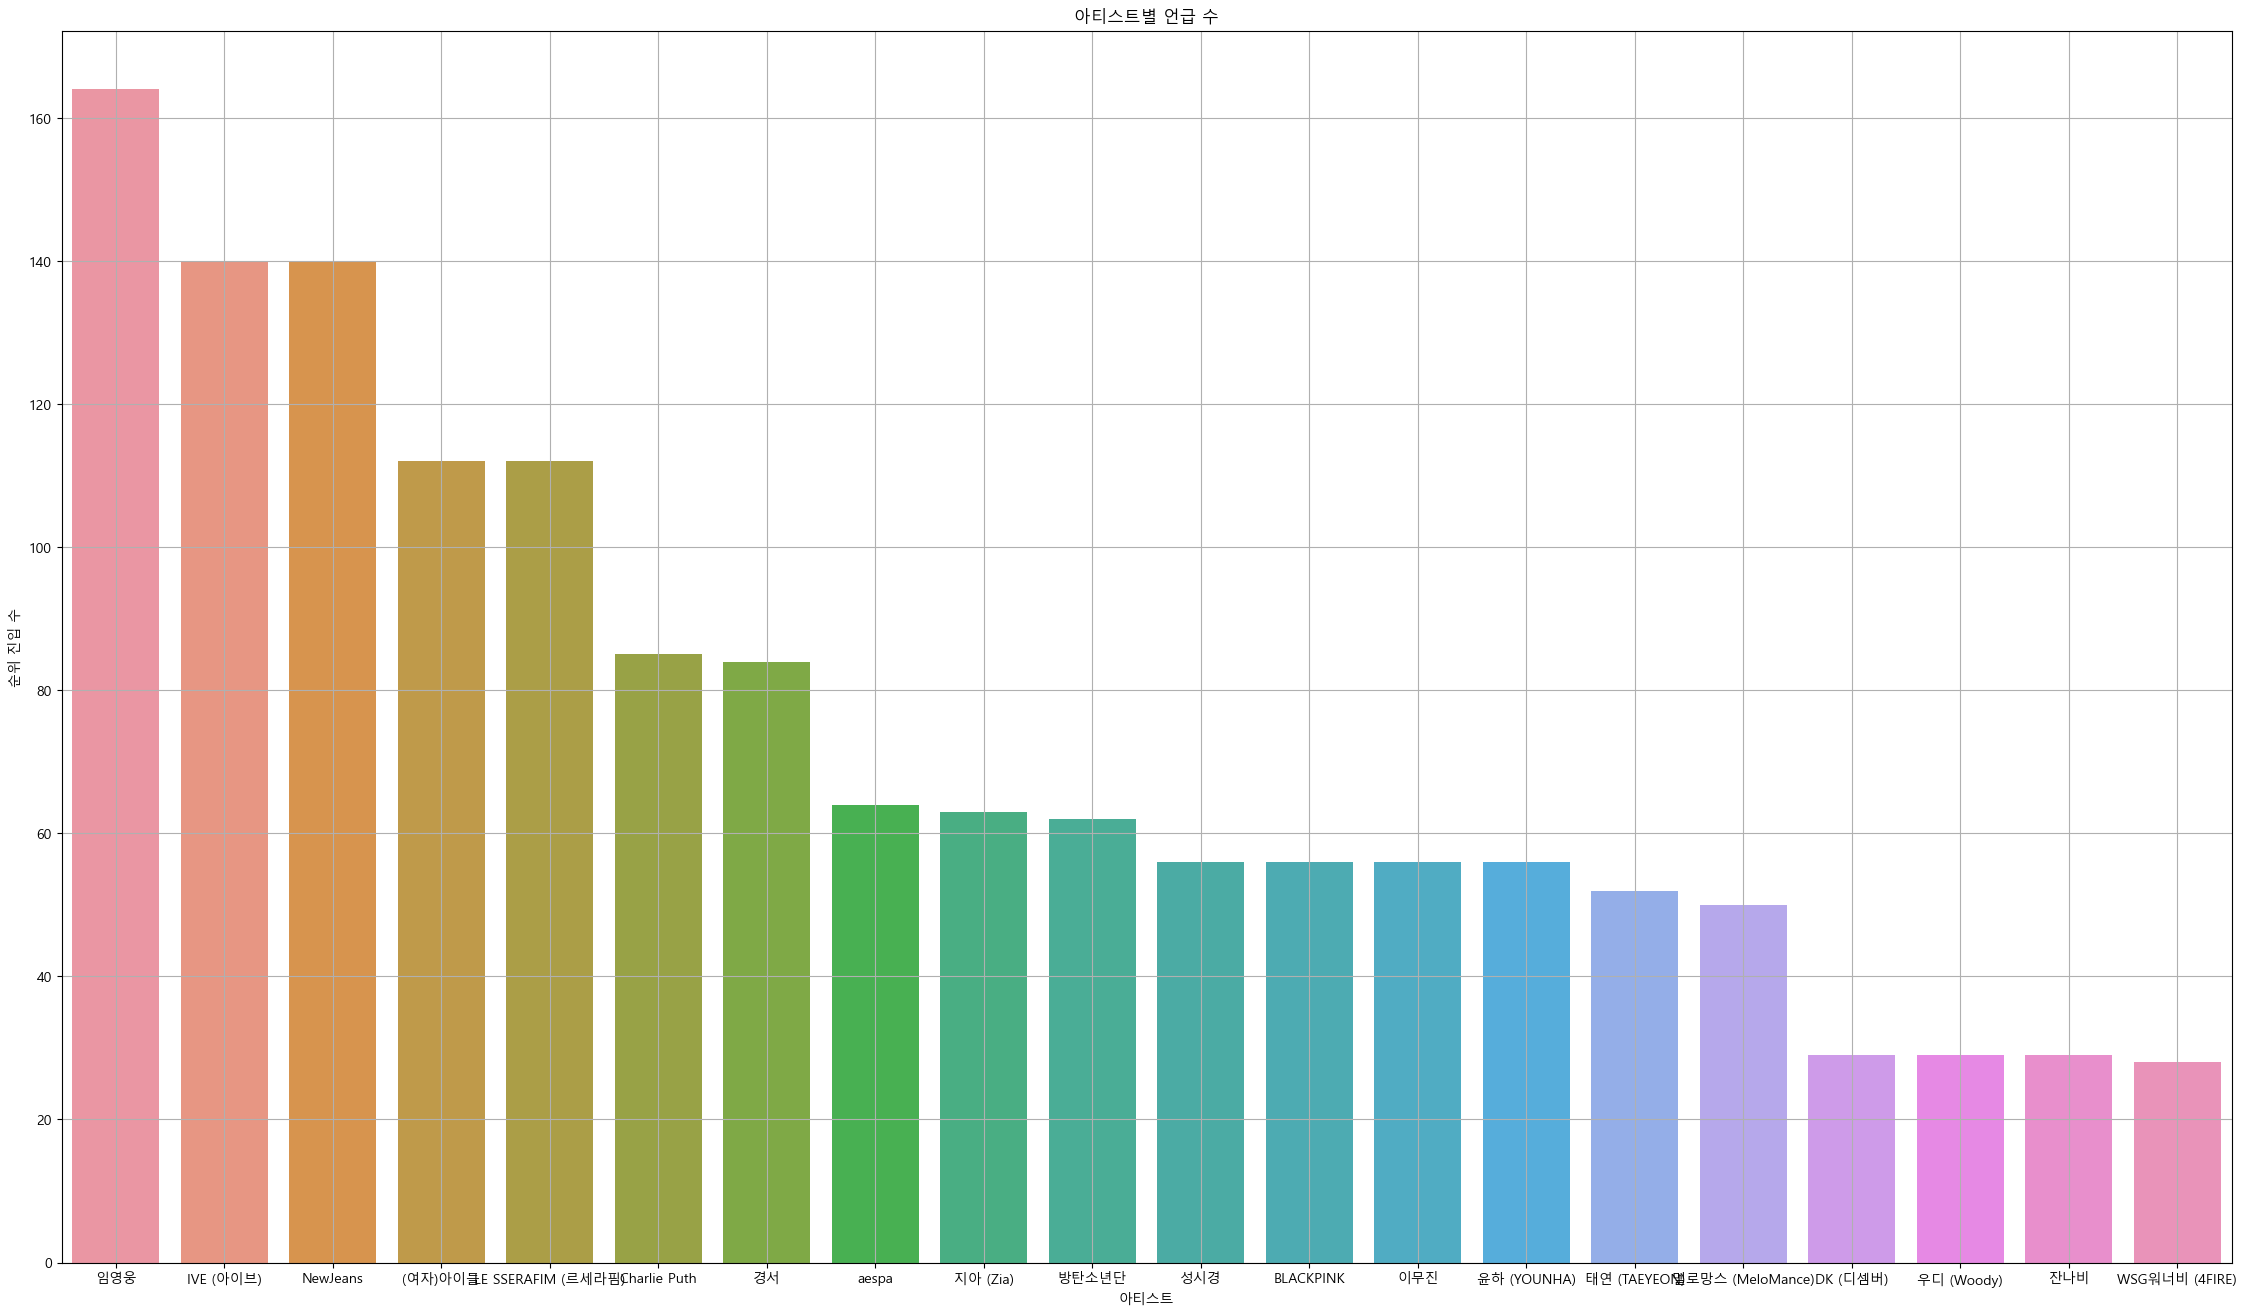

In [15]:
# 글자 크기
plt.rcParams['font.size'] = 10
# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (28, 16)

sb.barplot(data=xlsx2, x="아티스트", y="언급횟수")
plt.title("아티스트별 언급 수")
plt.grid()
plt.xlabel("아티스트")
plt.ylabel("순위 진입 수")
plt.show()
plt.close()

Pie Plot 그리기

In [16]:
xlsx2.columns

Index(['아티스트', '언급횟수'], dtype='object')

['임영웅', 'IVE (아이브)', 'NewJeans', '(여자)아이들', 'LE SSERAFIM (르세라핌)', 'Charlie Puth', '경서', 'aespa', '지아 (Zia)', '방탄소년단', '성시경', 'BLACKPINK', '이무진', '윤하 (YOUNHA)', '태연 (TAEYEON)', '멜로망스 (MeloMance)', 'DK (디셈버)', '우디 (Woody)', '잔나비', 'WSG워너비 (4FIRE)']


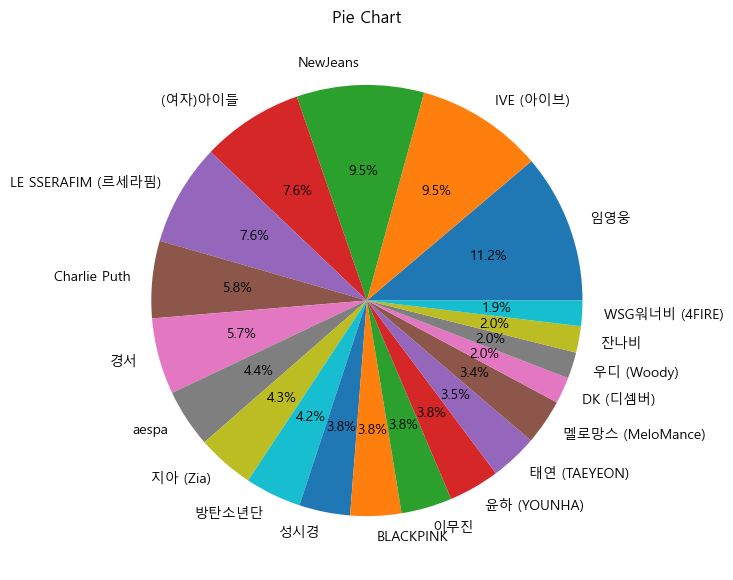

In [17]:
artistList = []
for artist in xlsx2['아티스트']:
    artistList.append(artist)

print(artistList)

# 글자 크기
plt.rcParams['font.size'] = 10
# 그래프 크기 설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)
plt.figure()
plt.title("Pie Chart")
# label은 artistList로 20 종류의 아티스트 입력
# 소수 첫째자리까지 표현
plt.pie(data=xlsx2, labels=artistList,
        x='언급횟수', autopct="%0.1f%%")
plt.show()
plt.close()

## 이제 워드클라우드를 넣어보자

main1.xlsx에서 아티스트별 횟수를 확인하고 txt 파일에 작성

In [20]:
# Excel 파일에서 데이터 읽어오기
dfCloud = read_excel("C:\\Users\\jehyu\\Desktop\\SemiProject2\\main\\main1.xlsx")
dfCloud

,아티스트,진입횟수
0,임영웅,164
1,IVE (아이브),140
2,NewJeans,140
3,(여자)아이들,112
4,LE SSERAFIM (르세라핌),112
5,Charlie Puth,85
6,경서,84
7,aespa,64
8,지아 (Zia),63
9,방탄소년단,62


In [21]:
# 아티스트별 진입 횟수를 딕셔너리로 카운트
artist_counts = dfCloud.groupby('아티스트')['진입횟수'].sum().to_dict()
print(artist_counts)

{'(여자)아이들': 112, 'BLACKPINK': 56, 'Charlie Puth': 85, 'DK (디셈버)': 29, 'IVE (아이브)': 140, 'LE SSERAFIM (르세라핌)': 112, 'NewJeans': 140, 'WSG워너비 (4FIRE)': 28, 'aespa': 64, '경서': 84, '멜로망스 (MeloMance)': 50, '방탄소년단': 62, '성시경': 56, '우디 (Woody)': 29, '윤하 (YOUNHA)': 56, '이무진': 56, '임영웅': 164, '잔나비': 29, '지아 (Zia)': 63, '태연 (TAEYEON)': 52}


In [22]:
with open("artist_names.txt", "w") as f:
    for artist, count in artist_counts.items():
        f.write((artist + ", ")*count)

In [23]:
with open("artist_names.txt", "r") as f:
    text = f.read()
    print(text)

(여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (여자)아이들, (

In [24]:
from IPython.display import Image, display
from konlpy.tag import Okt
from wordcloud import WordCloud
import sys
import os

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

In [25]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()

# 명사들만 추출 -> 리스트형식으로 반환
nouns = nlp.nouns(text)
print(nouns)

['여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자', '아이', '여자

어렵네